In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'PIL.JpegImagePlugin.JpegImageFile'>


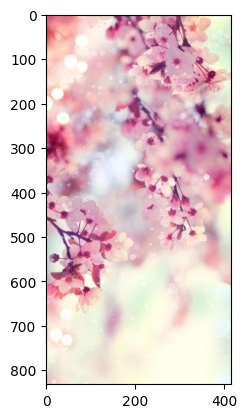

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image   # 파이썬의 이미지 처리 패키지 Pillow
img=Image.open("/content/drive/MyDrive/daejeon/다운로드.jpg")
plt.imshow(img)     # 이미지 출력
print(type(img))    # JpgeImageFile
plt.show()

In [13]:
import numpy as np    #열  행       # 열이 먼저 옴
im=np.array(img)
np.array(im).shape # (832x416x3) # ndarray로 바꿈
print (im.shape)
# interlacing : 고속으로 이미지를 웹에서 출력하는 함수
im.ndim  # 3 => RGB     channel

(832, 416, 3)


3

float64


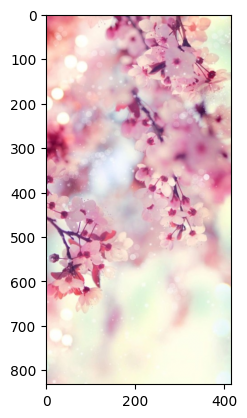

In [14]:
image_data=np.array(img).astype(float)/255  # image 정규화=> 부동소수점 이미지로
print(image_data.dtype)     # float64
plt.imshow(image_data)      # plt=> 정수이미지하고 부동소수점 이미지를 둘 다 지원
plt.show()

In [18]:
!pip install pygifsicle     # gif animation

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pygifsicle: filename=pygifsicle-1.0.7-py3-none-any.whl size=4091 sha256=7e6feee72721e3deefda035318db54c49527abad05876a1ec26c285dc0ee1075
  Stored in directory: /root/.cache/pip/wheels/10/1a/64/20bef5aa8a98420f584a2f5befeccce58aceefcab0063ee429
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5631 sha256=53ae957713da068617868c918a2a8598ef872e202c52649ed247f5f8530cf40a
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built pygifsicle support_developer


In [22]:
!apt-get install gifsicle

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  gifsicle
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 148 kB of archives.
After this operation, 370 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gifsicle amd64 1.93-2 [148 kB]
Fetched 148 kB in 1s (253 kB/s)
Selecting previously unselected package gifsicle.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../gifsicle_1.93-2_amd64.deb ...
Unpacking gifsicle (1.93-2) ...
Setting up gifsicle (1.93-2) ...
Processing triggers for man-db (2.10.2-1) ...


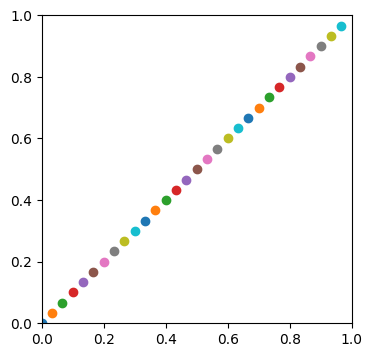

In [23]:
import imageio.v3 as iio
from pygifsicle import optimize
n=100
gif_path='test.gif'
n=30
plt.figure(figsize=(4,4))
for x in range(n):
    plt.scatter(x/n,x/n)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.savefig(f'{x}.jpg')

frames=np.stack([iio.imread(f'{x}.jpg') for x in range(n)], axis=0)
iio.imwrite(gif_path, frames)
# gif animation  용량을 압축
optimize(gif_path)

<ipython-input-375-32f67a8a63a9>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face= misc.face()   # 이미지 학습 지원
<ipython-input-375-32f67a8a63a9>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_read=imageio.imread('face.png')# 이미지 로드


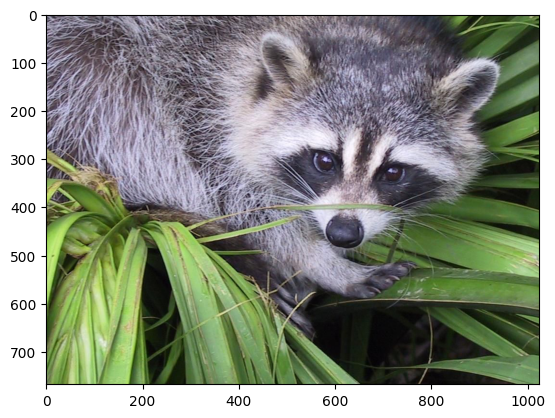

In [375]:
from scipy import misc
import imageio
face= misc.face()   # 이미지 학습 지원
imageio.imwrite('face.png',face)    # 이미지 입출력 지원(지금은 저장)
face_read=imageio.imread('face.png')# 이미지 로드
plt.imshow(face_read)
plt.show()

(-0.5, 1270.5, 1176.5, -0.5)

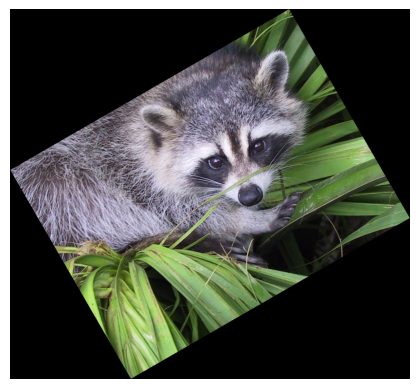

In [25]:
from scipy import ndimage
rotated_face=ndimage.rotate(face,30)   # rotate = 행렬을 자동으로 생성
plt.imshow(face, cmap=plt.cm.gray)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

In [26]:
face.shape  # (768, 1024, 3)

(768, 1024, 3)

(-0.5, 823.5, 567.5, -0.5)

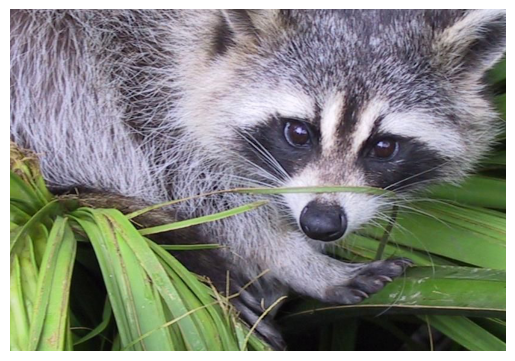

In [383]:
# 일부만 때어 내기
cropped_face=face[100:-100,100:-100]    # - 는 뒤에서 부터
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

<ipython-input-149-a63ac1219a11>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face()


(-0.5, 511.5, 383.5, -0.5)

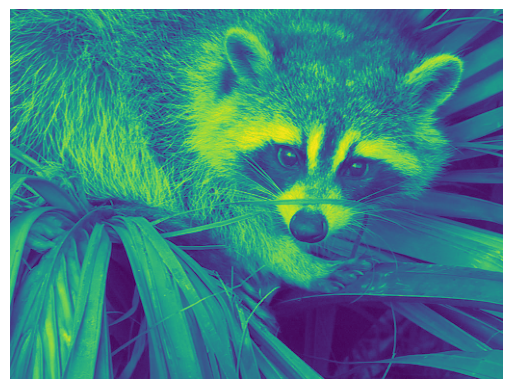

In [149]:
# 흑백으로 변경
# zoom: 보간법을 이용해서 이미지 해상도 조절
face=misc.face()
# 정수로 하면 해상도가 늘어남
face=face.sum(axis=2)/3 # z방향으로(RGB), 컬러를 흑으로
zoomed_face=ndimage.zoom(face,0.5)
zoomed_face.shape
plt.imshow(zoomed_face, vmin=0, vmax=255)
plt.axis('off')
# 1차원 pixel 사각형한점: anti-aliasing
# 1차원은 픽셀, 2차원은 한 행 데이터 , 3차원은 이미지 1장

(-0.5, 511.5, 383.5, -0.5)

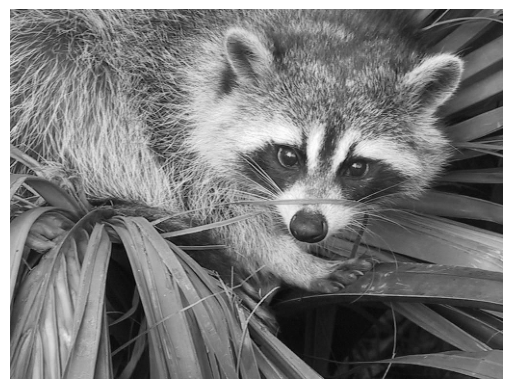

In [34]:
# 흑백으로
plt.imshow(zoomed_face,cmap=plt.cm.gray)
plt.axis('off')

<ipython-input-43-d8f079dc3177>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face()


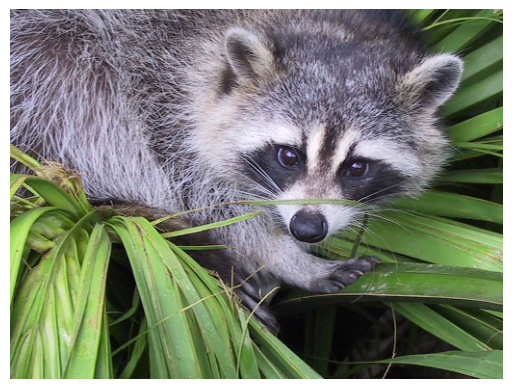

In [43]:
face=misc.face()
# 축소비율 설정 (높이와 너비는 0.5 , 채널은 1유지)
# (0.5,0.5,1) 3개의 값으로 해상도 비율을 조절
# 열 해상도 반, 행 해상도 반, 그리고 컬러는 그대로
zoomed_face=ndimage.zoom(face,(0.5, 0.5, 1))    # 숫자가 낮아짐에 따라 저해상도로 향한다
# 이미지 조절
plt.imshow(zoomed_face)
plt.axis('off')
plt.show()

<ipython-input-45-19df0fa0ff6e>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face()


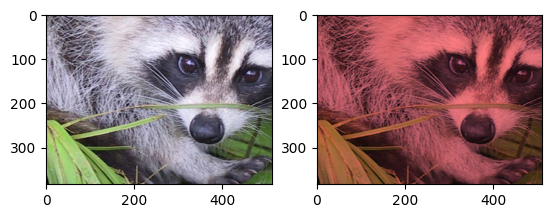

(384, 512, 3)


In [45]:
face=misc.face()
face=face.astype(float)/255
lx, ly, lz = face.shape
face=face[int(lx/4):-int(lx/4),int(ly/4):-int(ly/4)]
# 컬러연산
img_tinted=face*[1.0,0.5,0.5]   # RGB 모든 컬러에 그린 약화, 블루 약화  => 레드가 도드라짐
 # broadcasting
plt.subplot(1,2,1)
plt.imshow(face)
plt.subplot(1,2,2)
plt.imshow(img_tinted)
plt.show()
print(img_tinted.shape)

In [50]:
face.shape
byte_calc=384* 512* 3   # 바이트 단위
print("바이트:",byte_calc)
print('칼로바이트',byte_calc/1024)
print('메가바이트',byte_calc/1024/1024)

바이트: 589824
칼로바이트 576.0
메가바이트 0.5625


<ipython-input-358-cb2a1ca15fdb>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f=misc.face(gray=True)   #흑백이미지


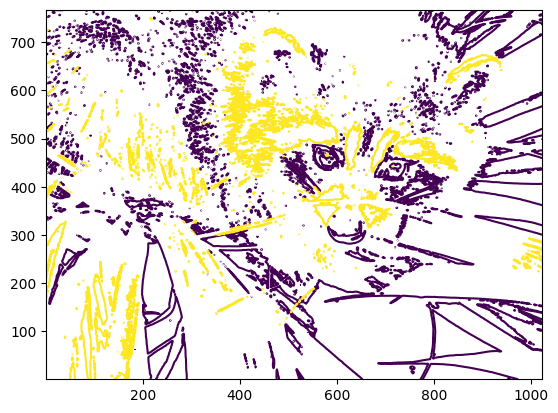

In [358]:
f=misc.face(gray=True)   #흑백이미지
plt.contour(f,[50,200],origin='image') # 등고선으로 표현   # 같은 컬러는 선으로 경계선을 그어줌

In [103]:
face=misc.face(gray=True)
lx,ly=face.shape    #768/2,1024/2 => 중심을 구함
X,Y=np.ogrid[0:lx,0:ly]
X.shape#(768, 1)
Y.shape#(1, 1024)

<ipython-input-103-7d7ac1987963>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face(gray=True)


(1, 1024)

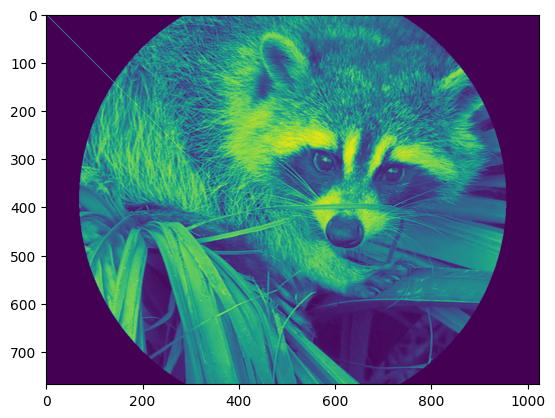

In [72]:
#
    #
mask=(X-lx/2)**2+(Y-ly/2)**2>lx*ly/4
# T/F 로 값을 구현 => boolean index 연산
face[mask]=0    # 중심에서 원을 기준으로, 컬러에서 0=> 검은색
face[range(400),range(400)]=255 # 255=>white

plt.imshow(face)
# broadcasting 조합을 생성, 모든 정점에 대한 좌표

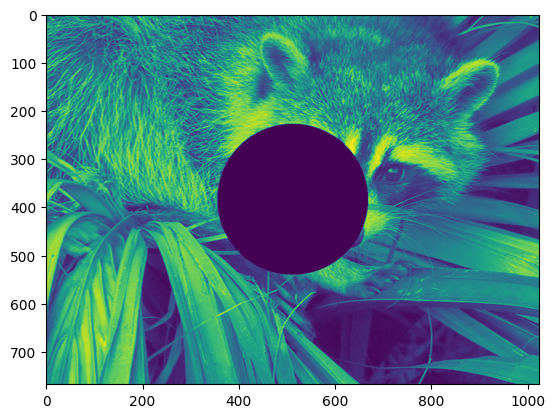

In [74]:
# 작은 원
mask=(X-lx/2)**2+(Y-ly/2)**2<lx*ly/32
face[mask]=0
plt.imshow(face)

In [106]:
# 문제) 위의 도넛에서 거꾸로 해주세요
face=misc.face(gray=True)

<ipython-input-106-9c63aacf659d>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face(gray=True)


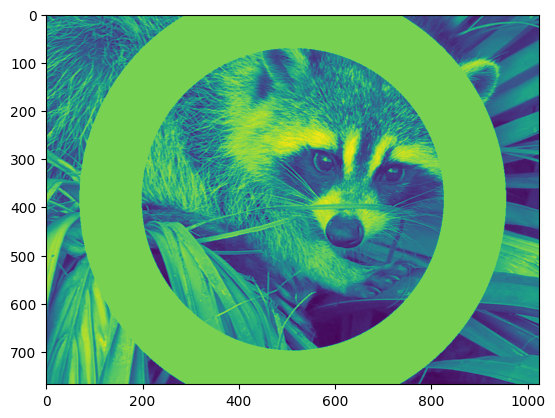

In [107]:
#mask=((X-lx/2)**2+(Y-ly/2)**2>lx*ly/32&(X-lx/2)**2+(Y-ly/2)**2<lx*ly/4)
mask1=(X-lx/2)**2+(Y-ly/2)**2<lx*ly/4
mask2=(X-lx/2)**2+(Y-ly/2)**2>lx*ly/8
mask3=mask1&mask2
face[mask3]=200
plt.imshow(face)

<ipython-input-114-630b720cefe6>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f= scipy.misc.face(gray=True)


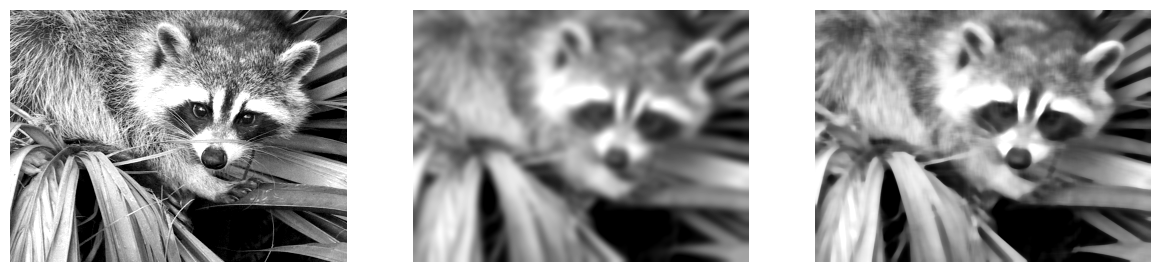

In [114]:
# filter
import scipy
f= scipy.misc.face(gray=True)
noisy=f+0.6*f.std()*np.random.random(f.shape)
# gaussian_filter 이미지에 사용 : 노이즈 제거
# 768*1024
# 한칸씩 이동
# 768-10 +1
# 가우시안은 정규분포, 그래서 가운데에 밀집되어 있으므로 가운데 쪽(밀집된 쪽)이 더 많이 적용
# 시계열분석의 이동평균법: 단순이동평균법, 가중이동평균법, 지수이동평균법
# 필터 사이즈
gauss_denoised=ndimage.gaussian_filter(noisy,10)    # 10x10
med_denoised=ndimage.median_filter(noisy,20)
plt.figure(figsize=(12,2.8))
plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)  # vmin,vmax 는 컬러값의 법위를 지정
plt.axis('off')
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1) # 이미지와 이미지 사이의 간격

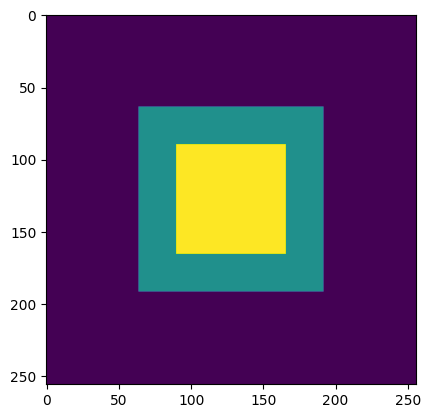

In [345]:
im=np.zeros((256,256))
im[64:-64,64:-64]=1
im[90:-90,90:-90]=2
im=ndimage.gaussian_filter(im,0) # 0으로 하면 필터가 적용x
plt.imshow(im)
plt.show()

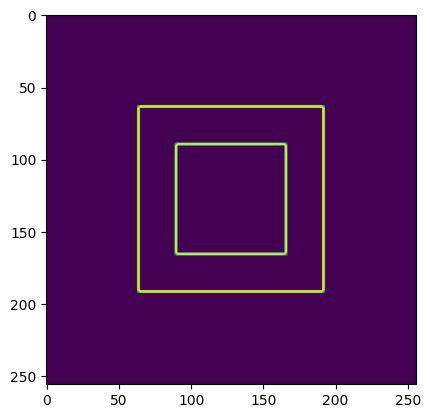

In [346]:
# sobel filter
# 0 1 0 # 수직필터  보통 3x3, 아니면 5x5  : 사이즈가 다른 이유
# 작은 사이즈는 작은 특징을 잡아내고
# 큰 사이즈는 대형 특징을 잡아냄
# 0 1 0
# 0 1 0
# 경계선을 구하는 필터
# 0 0 0 # 수평필터
# 1 1 1
# 0 0 0
# 그래프에서 변화량 표현할 때 : gif.animation 으로 표현할 것
# 0에서 1로 변화하는것을 찾아내는 것
sx=ndimage.sobel(im, axis=0, mode='constant')
sy=ndimage.sobel(im, axis=1, mode='constant')
sob=np.hypot(sx,sy) # 피타고라스 정리에 의해서 값을 결정

plt.imshow(sob)
plt.show()

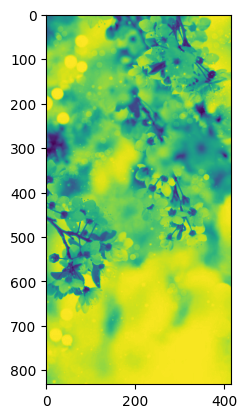

In [348]:
# sklearn : scikits를 구 현한 패키지
# skimage
from skimage.color import rgb2gray
from skimage.io import imread
from scipy import ndimage as ndi
# 흑백이미지로 변환
img = rgb2gray(imread(('/content/drive/MyDrive/daejeon/다운로드.jpg')))
w,h = img.shape
plt.imshow(img)
plt.show()

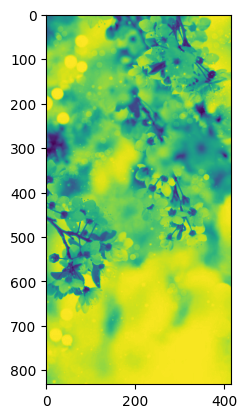

In [349]:
mat_identity=np.array([[1,0,0],[0,1,0],[0,0,1]])    # 단위행렬
# 행렬연산을 함수로 만들어 진것
img1=ndi.affine_transform(img,mat_identity) # 동차 좌표계에서 변환
plt.imshow(img1)
plt.show()

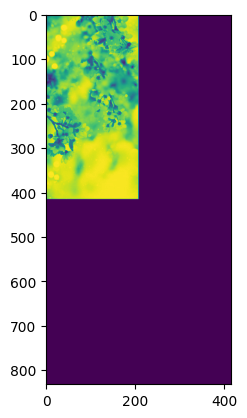

In [350]:
# 대각행렬은 사이즈에 관여x      y
mat_identity=np.array([[2,0,0],[0,2,0],[0,0,1]])    # 단위행렬
# @행렬연산을 함수로 만들어 진것
img1=ndi.affine_transform(img,mat_identity) # 동차 좌표계에서 변환
plt.imshow(img1)
plt.show()

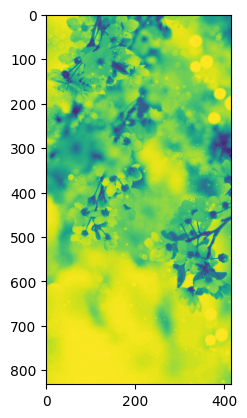

In [141]:
import numpy as np
# 반사 행렬  좌우로 , 물이나 거울 반사에 사용
mat_reflect=np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img1=ndi.affine_transform(img,mat_reflect)
plt.imshow(img1)
plt.show()

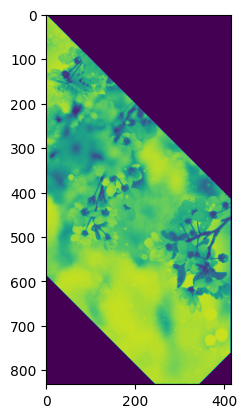

In [145]:
# 회전
# 회전은 원점을 중심
theta=np.pi/4
mat_rotate=np.array([[np.cos(theta),np.sin(theta),0],
                     [np.sin(theta),-np.cos(theta),0],
                     [0,0,1]])
img1=ndi.affine_transform(img1, mat_rotate)
plt.imshow(img1)
plt.show()

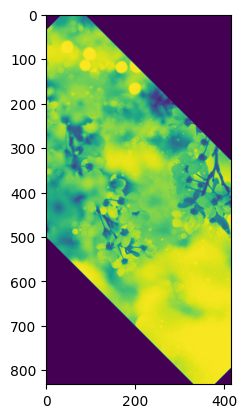

In [351]:
# 회전
# 회전은 원점을 중심
img= rgb2gray ( imread(("/content/drive/MyDrive/daejeon/다운로드.jpg")))
theta = np.pi/4
mat_rotate =  np.array([[1,0,w/2],[0,1,h/2],[0,0,1]])@np.array([[np.cos(theta),np.sin(theta),0],
                        [np.sin(theta),-np.cos(theta),0],[0,0,1]]) @np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img = ndi.affine_transform(img, mat_rotate)
plt.imshow(img)
plt.show()

In [ ]:
# 행렬곱 연산은 변환의 합
# Deep learning : layer 가 깊어지는 것
# 가중치 x  가중치 @ 가중치 => 변환의 합 분류, 예측

In [152]:
from scipy import linalg
import numpy as np
A= np.array([[1,2],[3,4]])
A=A@ A.T # 결과는 허수
# 행렬곱 => 행렬과 전치한것을 곱한것
l,v=linalg.eig(A)
print(l)
print(v)

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [ ]:
# rnorm , dnorm(정규분포 밀도), pnorm(누적분포), qnorm(분위수)
#  rvs     pdf                      cdf             ppf
#           density               cumuative        percent

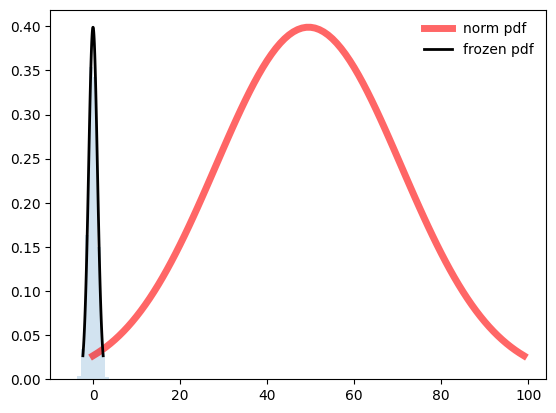

In [353]:
from scipy.stats import norm        # stats 정규분포
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1)
# 1차적률, 2차적률, 3차적률, 4차적률
# mean      var     skew    kurt(첨도)
mean,var,skew,kurt= norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
# 분위수에 해당애더지는 확률 밀도함수 값
ax.plot(norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
rv=norm()   #인스턴스
ax.plot(x, rv.pdf(x),'k-',lw=2,label='frozen pdf')
vals=norm.ppf(0.001,0.5,0.999)  # ppf의 매개변수 cdf
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
# 모두같다
r=norm.rvs(size=100000)
ax.hist(r, density=True, histtype='stepfilled',alpha=0.2)   # stepfilled 색칠해짐, 알파는 투명도
ax.legend(loc='best', frameon=False)    # 범례의 위치는 best
plt.show()

In [167]:
# 평균테스트 : 평군 (귀무가설에 대한)
from scipy import stats
Y=stats.norm()
print(len(Y.rvs(size=1000)))
stats.ttest_1samp(Y.rvs(size=1000),0.1 )

1000


TtestResult(statistic=-2.2433610643745023, pvalue=0.025092026030333534, df=999)

In [171]:
stats.ttest_1samp(Y.rvs(size=1000),Y.mean())

TtestResult(statistic=1.005017982659368, pvalue=0.3151315550555501, df=999)

In [172]:
data1=Y.rvs(size=1000)
data2=Y.rvs(size=1000)
# 귀무가설은 두 집단의 평균이 같다
# 대립가설은 두 집단의 평균이 유의미하게 다르다
t_statistics, p_value=stats.ttest_ind(data1, data2)
print("t 통계값", t_statistics)
print('p_value',p_value)    # 귀무가설을 기각하지 못한다 ( 두 집단의 평균은 같다)

t 통계값 -0.5353170651703745
p_value 0.5924902031227943


In [173]:
# 귀무가설 : 상관이 없다
# 대립가설 : 상관이 있다.

dalc = np.array([6.47,6.13,6.19,4.89,5.63,4.52,5.89,4.79,5.27,6.08])
dtob = np.array([4.03,3.76,3.77,3.34,3.47,2.92,3.2,2.71,3.53,4.51])
stats.pearsonr(dalc, dtob)
# 귀무가설을 기각하지 하고 두 데이터는 상관이 있다

PearsonRResult(statistic=0.7842873201538678, pvalue=0.0072343583517294864)

In [355]:
# 선형회귀의 귀무가설은 기울기가 0일 것이다
#  pvalue=0.007234358351729509
# 그러므로 선형회귀에 의미가 있다?
#
print(stats.linregress(dalc,dtob))
# 귀무가설을 기각하지 하고 두 데이터는 상관이 있다
# slope(기울기)
# intercept(절편)
# rvalue(상관계수)
# pvalue(유의확률)
# stderr(기울기의 표준 오차)
# intercept_stderr(절편의 표준 오차)

LinregressResult(slope=0.6115012914647241, intercept=0.10815378587805125, rvalue=0.7842873201538676, pvalue=0.007234358351729509, stderr=0.17102020517368527, intercept_stderr=0.9616276197074791)
[[1 1 3]
 [1 2 3]
 [1 2 3]]


In [179]:
# optimalization
from scipy .optimize import curve_fit
x= np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y= np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
# 함수관계
z= np.polyfit(x,y,3)    # 3차 방정식
print('3차 다항식의 계수',z)
p= np.poly1d(z) # 방정식을 작성
print(p)
p(0.5)
p(3.5)
p(10)

3차 다항식의 계수 [ 0.08703704 -0.81349206  1.69312169 -0.03968254]
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


22.579365079364877

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


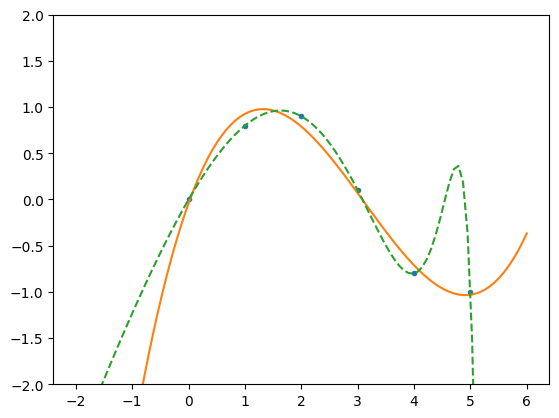

In [184]:
xp=np.linspace(-2,6,100)
# 과적합 : 학습데이터에만 사용가능한 방정식
p30=np.poly1d(np.polyfit(x,y,30))

_=plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'--')
plt.ylim(-2,2)
plt.show()

In [188]:
# inferential 추론(확률) : 최대우도법
#     모집단의 분포가 중요 : 분포를 모름 ->  그 데이터에 적합한 분포를 모름
#     추론 : posibility 가능도가 가장 큰 것을 모집단의 분포로 본다
# diffential  미분(기울기를 구해가지고 0이되는 지점을 찾아가는 것: 초월구성:무작위 대입법, 범위를 주고 찾)
# huristic    탐색적 방법       <- 노가다
    # 게임 : 케릭터 : 자동이동
    # 현재지점 -------- 목표지점
    # grid 생성 (8개의 방향) - 목표지점 까지의 비용 계산
    # 비용이 가장 작은 것을 선택 ( 트리 )
    #
# ㅁㅁㅁ
# ㅁㅇㅁ
# ㅁㅁㅁ

In [362]:
def f(x):
    return 4*x**3+(x-2)**2+x**4

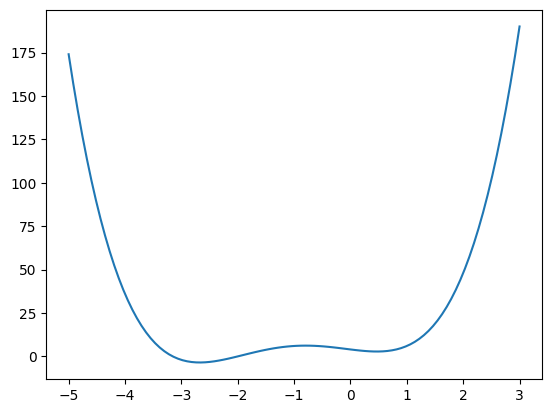

In [363]:
fig,ax=plt.subplots()
x=np.linspace(-5,3,100) # 전역해, 지역해
ax.plot(x,f(x))

In [364]:
# BFGS: quasi-Newton

In [365]:
from scipy import optimize
x_min=optimize.fmin_bfgs(f,-2)  # 뉴톤법은 찾는 근처의 값을 알려줘야 함
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [366]:
optimize.fmin_bfgs(f,0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

In [370]:
# 무작위 대입법
optimize.brent(f)

0.46961743402759754

In [195]:
optimize.fminbound(f,-4,2)  # 범위값 내에서 확인

-2.6729822917513886

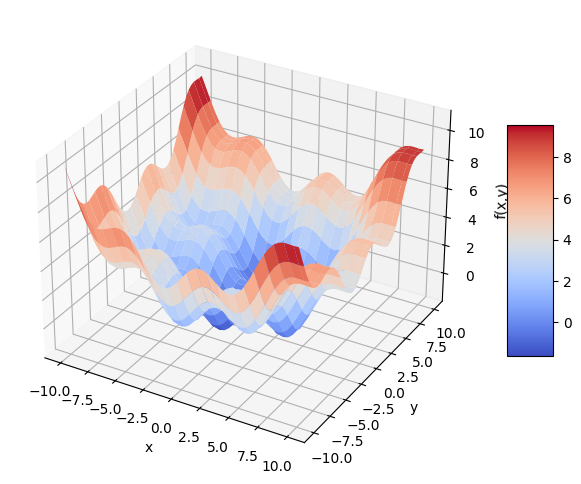

In [203]:
# interpolation 으로 그려진 그림 : 어디 근처인지는 확인이 가능하지만 정확하게는 못구함()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
    x, y=p
    return (np.sin(x)+0.05*x**2
            +np.sin(y)+0.05*y**2)
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)  # 50x50 grid 생성
Z=fm((X,Y))
fig=plt.figure(figsize=(9,6))
# ax= fig.gca(projection='3d')
ax=fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2, cstride=2, cmap=mpl.cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [211]:
import scipy.optimize as spo

def fo(p):
    x,y=p
    z= np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output ==True:
        print("%8.4f %8.4f %8.4f" %(x,y,z))
    return z
output=False
# brute 무작위 대입법 : 정밀도를 어떻게 주는가에 따라 결과값이 달라짐
opt0= spo.brute(fo, ((-10,10.1,5),(-10,10.1,5)), finish=None)
print(opt0)
output=False
# 너무 미세하기 주면 자원의 한계 (메모리, 시간)
opt1 = spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)), finish=None)
print(opt1)

[0. 0.]
[-1.4 -1.4]


In [213]:
opt_out=spo.fmin(fo, opt0, xtol=0.001, ftol=0.001, maxiter=15,maxfun=20)

print(opt_out)# [0. 0.]
fm(opt_out)
output=False
spo.fmin(fo,(2.0,2.0),maxiter=250) # array([4.2710728 , 4.27106945])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
[0. 0.]
Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [217]:
# 미분을 사용하지 않음
output=True
opt_out=spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15,maxfun=20)

print(opt_out)# [-1.42702972 -1.42876755]           <= 더 정밀하게 준것을 대입했을 시
fm(opt_out)
output=False
#spo.fmin(fo,(2.0,2.0),maxiter=250) # array([4.2710728 , 4.27106945])

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757
[-1.42702972 -1.42876755]


<ipython-input-217-af16925a049c>:3: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt_out=spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15,maxfun=20)


In [329]:
import pandas as pd
read_file=pd.read_csv('/content/drive/MyDrive/daejeon/play_top30.csv',skiprows=1)
read_file.head()

Rank         Player Team Pos  GP   G   A    P  +/-  PIM  ...  PPP  SHG  \
0     1  Sidney Crosby  PIT   C  80  36  68  104   18   46  ...   38    0   
1     2   Ryan Getzlaf  ANA   C  77  31  56   87   28   31  ...   23    0   
2     3  Claude Giroux  PHI   C  82  28  58   86    7   46  ...   37    0   
3     4   Tyler Seguin  DAL   C  80  37  47   84   16   18  ...   25    0   
4     5    Corey Perry  ANA   R  81  43  39   82   32   65  ...   18    0   

   SHP  GW  OT    S    S%  TOI/GP Shift/GP   FO%  
0    0   5   1  259  13.9   21:58     24.0  52.5  
1    0   7   1  204  15.2   21:17     25.2  49.0  
2    0   7   1  223  12.6   20:26     25.1  52.9  
3    0   8   0  294  12.6   19:20     23.4  41.5  
4    0   9   1  280  15.4   19:28     23.2  36.0  

[5 rows x 21 columns]

In [225]:
read_file.describe()

Rank         GP          G          A           P        +/-  \
count  30.000000  30.000000  30.000000  30.000000   30.000000  30.000000   
mean   15.500000  77.733333  29.266667  45.466667   74.733333   7.500000   
std     8.803408   6.169633   8.106759   9.235364    8.501251  18.554208   
min     1.000000  59.000000  11.000000  28.000000   65.000000 -35.000000   
25%     8.250000  76.250000  24.000000  40.000000   69.000000  -5.750000   
50%    15.500000  80.000000  28.000000  43.000000   71.000000   9.000000   
75%    22.750000  82.000000  34.000000  49.750000   79.000000  20.750000   
max    30.000000  82.000000  51.000000  68.000000  104.000000  39.000000   

             PIM        PPG        PPP        SHG        SHP         GW  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   39.200000   8.266667  23.900000   0.333333   0.633333   5.000000   
std    15.968503   4.217642   7.567398   0.711159   1.159171   2.363516   
min    10.000000   2.000000  15.000000   0.000000   0.000000   1.000000   
25%    27.250000   5.000000  19.000000   0.000000   0.000000   3.250000   
50%    40.000000   8.000000  22.000000   0.000000   0.000000   5.000000   
75%    47.500000  10.000000  25.000000   0.000000   1.000000   6.000000   
max    66.000000  24.000000  44.000000   3.000000   5.000000  10.000000   

              OT           S         S%   Shift/GP       FO%  
count  30.000000   30.000000  30.000000  30.000000  30.00000  
mean    0.700000  233.566667  12.523333  24.060000  45.92000  
std     0.749713   51.470570   2.271819   1.920955  16.19656  
min     0.000000  122.000000   7.800000  21.300000   0.00000  
25%     0.000000  200.000000  10.900000  22.400000  42.00000  
50%     1.000000  224.000000  12.500000  23.900000  50.15000  
75%     1.000000  258.500000  13.975000  25.400000  53.20000  
max     3.000000  386.000000  18.200000  28.600000  75.00000

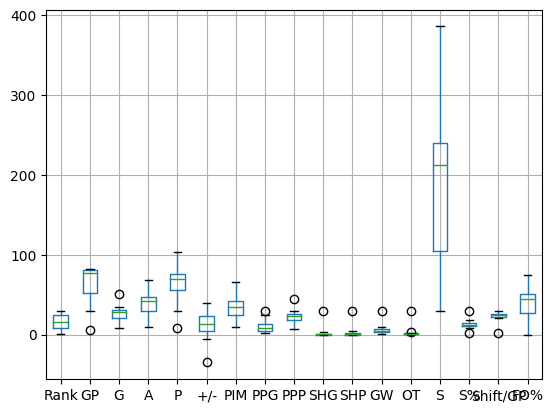

In [261]:
a=read_file.describe()
a.boxplot()
plt.show()

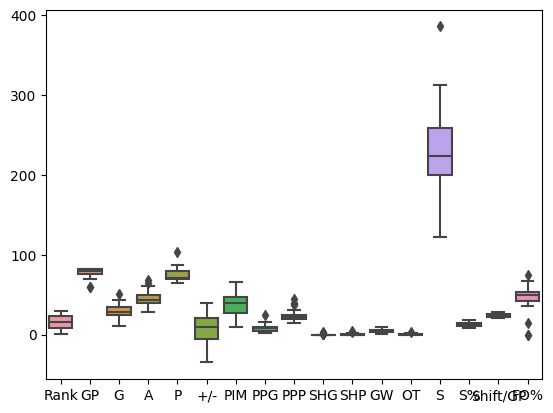

In [229]:
import seaborn as sns
sns.boxplot(data=read_file)
plt.show()

In [262]:
re_file=read_file.rename(columns={'P':'points','G':'goals','A':'Assists', 'S%':'shooting_percsntage',
                                  'Shift/GP':'shifts_per_game_played'})

In [236]:
re_file.columns

Index(['Rank', 'Player', 'Team', 'Pos', 'GP', 'goals', 'Assists', 'points',
       '+/-', 'PIM', 'PPG', 'PPP', 'SHG', 'SHP', 'GW', 'OT', 'S',
       'shooting_percsntage', 'TOI/GP', 'shifts_per_game_played', 'FO%'],
      dtype='object')

In [239]:
re_file.describe()

Rank         GP      goals    Assists      points        +/-  \
count  30.000000  30.000000  30.000000  30.000000   30.000000  30.000000   
mean   15.500000  77.733333  29.266667  45.466667   74.733333   7.500000   
std     8.803408   6.169633   8.106759   9.235364    8.501251  18.554208   
min     1.000000  59.000000  11.000000  28.000000   65.000000 -35.000000   
25%     8.250000  76.250000  24.000000  40.000000   69.000000  -5.750000   
50%    15.500000  80.000000  28.000000  43.000000   71.000000   9.000000   
75%    22.750000  82.000000  34.000000  49.750000   79.000000  20.750000   
max    30.000000  82.000000  51.000000  68.000000  104.000000  39.000000   

             PIM        PPG        PPP        SHG        SHP         GW  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   39.200000   8.266667  23.900000   0.333333   0.633333   5.000000   
std    15.968503   4.217642   7.567398   0.711159   1.159171   2.363516   
min    10.000000   2.000000  15.000000   0.000000   0.000000   1.000000   
25%    27.250000   5.000000  19.000000   0.000000   0.000000   3.250000   
50%    40.000000   8.000000  22.000000   0.000000   0.000000   5.000000   
75%    47.500000  10.000000  25.000000   0.000000   1.000000   6.000000   
max    66.000000  24.000000  44.000000   3.000000   5.000000  10.000000   

              OT           S  shooting_percsntage  shifts_per_game_played  \
count  30.000000   30.000000            30.000000               30.000000   
mean    0.700000  233.566667            12.523333               24.060000   
std     0.749713   51.470570             2.271819                1.920955   
min     0.000000  122.000000             7.800000               21.300000   
25%     0.000000  200.000000            10.900000               22.400000   
50%     1.000000  224.000000            12.500000               23.900000   
75%     1.000000  258.500000            13.975000               25.400000   
max     3.000000  386.000000            18.200000               28.600000   

            FO%  
count  30.00000  
mean   45.92000  
std    16.19656  
min     0.00000  
25%    42.00000  
50%    50.15000  
75%    53.20000  
max    75.00000

In [248]:
re_file.head()

Rank         Player Team Pos  GP  goals  Assists  points  +/-  PIM  ...  \
0     1  Sidney Crosby  PIT   C  80     36       68     104   18   46  ...   
1     2   Ryan Getzlaf  ANA   C  77     31       56      87   28   31  ...   
2     3  Claude Giroux  PHI   C  82     28       58      86    7   46  ...   
3     4   Tyler Seguin  DAL   C  80     37       47      84   16   18  ...   
4     5    Corey Perry  ANA   R  81     43       39      82   32   65  ...   

   PPP  SHG  SHP  GW  OT    S  shooting_percsntage  TOI/GP  \
0   38    0    0   5   1  259                 13.9   21:58   
1   23    0    0   7   1  204                 15.2   21:17   
2   37    0    0   7   1  223                 12.6   20:26   
3   25    0    0   8   0  294                 12.6   19:20   
4   18    0    0   9   1  280                 15.4   19:28   

  shifts_per_game_played   FO%  
0                   24.0  52.5  
1                   25.2  49.0  
2                   25.1  52.9  
3                   23.4  41.5  
4                   23.2  36.0  

[5 rows x 21 columns]

In [263]:
G=re_file[['goals','Assists','points']]
t=G.corr(method='pearson')
t

goals   Assists    points
goals    1.000000 -0.525854  0.382332
Assists -0.525854  1.000000  0.584901
points   0.382332  0.584901  1.000000

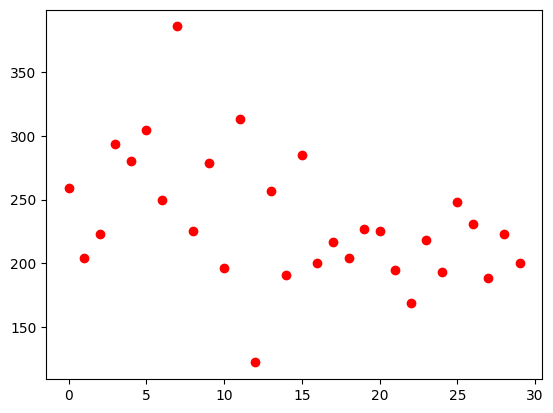

In [264]:
a1=list(re_file['S'])
plt.plot(a1,'ro')
plt.savefig('player.png')
plt.show()          # 분포도

<Axes: >

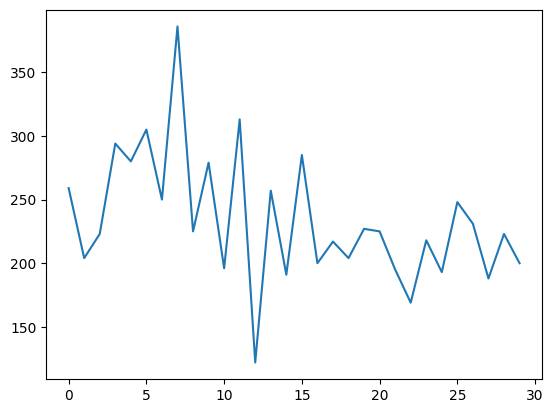

In [241]:
re_file['S'].plot()

# 포르젝트 요구사항
- 모델 서버 : flask 나 django 를 이용
- 게시판, 가입자관리 : java, 기본 프레임워크는 springboot <- Restful(서버는 하나만 있어도 )
- frontend: react(webpage), flutter(mobile)

In [250]:

# 문제 )
# 각 열중에 ['player','points','goals','assists']
# 열만 출력하는 함수를 작성하시오
#re_file['player','points','goals','assists']

Player  goals  Assists  points
0       Sidney Crosby     36       68     104
1        Ryan Getzlaf     31       56      87
2       Claude Giroux     28       58      86
3        Tyler Seguin     37       47      84
4         Corey Perry     43       39      82
5         Phil Kessel     37       43      80
6         Taylor Hall     27       53      80
7       Alex Ovechkin     51       28      79
8        Joe Pavelski     41       38      79
9          Jamie Benn     34       45      79
10  Nicklas Backstrom     18       61      79
11      Patrick Sharp     34       44      78
12       Joe Thornton     11       65      76
13      Erik Karlsson     20       54      74
14      Evgeni Malkin     23       49      72
15    Patrick Marleau     33       37      70
16       Anze Kopitar     29       41      70
17       Matt Duchene     23       47      70
18   Martin St. Louis     30       39      69
19       Patrick Kane     29       40      69
20      Blake Wheeler     28       41      69
21        Kyle Okposo     27       42      69
22       David Krejci     19       50      69
23       Chris Kunitz     35       33      68
24     Jonathan Toews     28       40      68
25       Thomas Vanek     27       41      68
26       Jaromir Jagr     24       43      67
27       John Tavares     24       42      66
28       Jason Spezza     23       43      66
29      Jordan Eberle     28       37      65

In [265]:
def select_player(x):
    df=x.loc[:,['Player','points','goals','Assists']]
    return df

select_player(re_file)

Player  points  goals  Assists
0       Sidney Crosby     104     36       68
1        Ryan Getzlaf      87     31       56
2       Claude Giroux      86     28       58
3        Tyler Seguin      84     37       47
4         Corey Perry      82     43       39
5         Phil Kessel      80     37       43
6         Taylor Hall      80     27       53
7       Alex Ovechkin      79     51       28
8        Joe Pavelski      79     41       38
9          Jamie Benn      79     34       45
10  Nicklas Backstrom      79     18       61
11      Patrick Sharp      78     34       44
12       Joe Thornton      76     11       65
13      Erik Karlsson      74     20       54
14      Evgeni Malkin      72     23       49
15    Patrick Marleau      70     33       37
16       Anze Kopitar      70     29       41
17       Matt Duchene      70     23       47
18   Martin St. Louis      69     30       39
19       Patrick Kane      69     29       40
20      Blake Wheeler      69     28       41
21        Kyle Okposo      69     27       42
22       David Krejci      69     19       50
23       Chris Kunitz      68     35       33
24     Jonathan Toews      68     28       40
25       Thomas Vanek      68     27       41
26       Jaromir Jagr      67     24       43
27       John Tavares      66     24       42
28       Jason Spezza      66     23       43
29      Jordan Eberle      65     28       37

In [268]:
# 각 열 중 lower < points <= upper 인 데이터 중
# player , points, goals, assists 열만 출력하시오
def point_select(x,lower,upper):
    target=x.where(x['points']>lower)
    target=target.where(target['points']<=upper)
    target=target.dropna()
    return select_player(target)


In [269]:
point_select(re_file,75,80)

Player  points  goals  Assists
5         Phil Kessel    80.0   37.0     43.0
6         Taylor Hall    80.0   27.0     53.0
7       Alex Ovechkin    79.0   51.0     28.0
8        Joe Pavelski    79.0   41.0     38.0
9          Jamie Benn    79.0   34.0     45.0
10  Nicklas Backstrom    79.0   18.0     61.0
11      Patrick Sharp    78.0   34.0     44.0
12       Joe Thornton    76.0   11.0     65.0

In [271]:
# 필드도 변화가 가능하고 범위값을 지정해서 선택할 수 있도록 함수를 작성하시오
def point_select ( x, variable, lower, upper):
    target=x.where(x[variable]>lower)
    target=target.where(target[variable]<=upper)
    target=target.dropna()
    return select_player(target)

point_select(re_file, 'points', 75,80)

Player  points  goals  Assists
5         Phil Kessel    80.0   37.0     43.0
6         Taylor Hall    80.0   27.0     53.0
7       Alex Ovechkin    79.0   51.0     28.0
8        Joe Pavelski    79.0   41.0     38.0
9          Jamie Benn    79.0   34.0     45.0
10  Nicklas Backstrom    79.0   18.0     61.0
11      Patrick Sharp    78.0   34.0     44.0
12       Joe Thornton    76.0   11.0     65.0

In [272]:
# 문제 :
# assists 와 goal간의 상관관계를 확인하고
# 회귀식을 작성한 다음
# goals가 [50,70,40,20] 인경우와 assists 를 predict 하시오

# 위의 회귀식작성과 예측을 함수화 하시오

In [274]:
# assists 와 goals간의 상관관계를 확인하고
F=re_file[['goals','Assists']]
t=F.corr(method='pearson')
t

goals   Assists
goals    1.000000 -0.525854
Assists -0.525854  1.000000

In [278]:
# 회귀식을 작성한 다음
goals=re_file['goals']
assists=re_file['Assists']

print(stats.linregress(goals,assists))
# pvalue=0.002840493421768488
slope=-0.5990625437246397
intercept=62.99923044634112
print(f"선형 회귀식: Assists = {slope:.2f} * goals + {intercept:.2f}")
# 이에 따라 귀무가설을 기각하고 대립가설을 채택한다

LinregressResult(slope=-0.5990625437246397, intercept=62.99923044634112, rvalue=-0.5258542550287959, pvalue=0.002840493421768488, stderr=0.1831218695190146, intercept_stderr=5.554562551907603)
선형 회귀식: Assists = -0.60 * goals + 63.00


In [283]:
# goals가 [50,70,40,20] 인경우와 assists 를 predict 하시오
goals=[50,70,40,20]
predict_assists= slope*2*np.array(goals)+intercept
predict_assists


array([  3.09297607, -20.86952568,  15.07422695,  39.0367287 ])

In [371]:
# 위의 회귀식작성과 예측을 함수화 하시오
def assists_predict(x):
    assists = re_file['Assists']
    goals = re_file['goals']
    result = stats.linregress(goals, assists)
    # result.slope
    # result.intercept
    # result.rvalue
    # result.pvalue
    # result.stderr
    ast=result.slope*2*x+result.intercept
    print(f'기울기 : {result.slope}')
    print("절편 (intercept):", {result.intercept})
    print("상관 계수 (rvalue):", {result.rvalue})
    print("p-value:", {result.pvalue})
    print("표본 표준 편차 (stderr):", {result.stderr})
    return  print(f'Assists 예상도 : {ast}')

assists_predict(50)

기울기 : -0.5990625437246397
절편 (intercept): {62.99923044634112}
상관 계수 (rvalue): {-0.5258542550287959}
p-value: {0.002840493421768488}
표본 표준 편차 (stderr): {0.1831218695190146}
Assists 예상도 : 3.0929760738771463


In [334]:
assists_predict(20)

39.036728697355535